In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('clean_df.csv')

In [ ]:
data.head()

,Unnamed: 0,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,...,No_Of_Wounded,Property,country,region,attacktype1,targtype1,target1,natlty1,gname,weaptype1
0,0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,...,0.0,0,58,2,1,14,Julio Guzman,58.0,MANO-D,13
1,1,1970,0,0,0,Mexico,North America,Mexico city,1,0,...,0.0,0,130,1,6,7,"Nadine Chaval, daughter",21.0,23rd of September Communist League,13
2,2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,...,0.0,0,160,5,1,10,Employee,217.0,Unknown,13
3,3,1970,1,0,0,Greece,Western Europe,Athens,1,0,...,0.0,1,78,8,3,7,U.S. Embassy,217.0,Unknown,6
4,4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,...,0.0,1,101,4,7,7,U.S. Consulate,217.0,Unknown,8


In [ ]:
data.isnull().sum()

Unnamed: 0            0
Year                  0
Month                 0
Day                   0
Extended              0
Country               0
Region                0
City                  0
Success               0
Suicide               0
Attack_Type           0
Target_Type           0
Target_Subtype        0
Target                0
Target_Nationality    0
Attack_Group          0
Weapon                0
No_Of_Killed          0
No_Of_Wounded         0
Property              0
country               0
region                0
attacktype1           0
targtype1             0
target1               0
natlty1               0
gname                 0
weaptype1             0
dtype: int64

In [ ]:
df = data.drop(columns = ['Unnamed: 0','Attack_Group','City','Attack_Type','Target_Type','Target_Subtype','Target','Target_Nationality','Weapon','gname','target1'], axis=1)
df.shape

(181691, 17)

In [ ]:
df['Region'].nunique()

12

In [ ]:
df['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = df.loc[:, df.columns != 'Success']
X.head()

,Year,Month,Day,Extended,Country,Region,Suicide,No_Of_Killed,No_Of_Wounded,Property,country,region,attacktype1,targtype1,natlty1,weaptype1
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,0,1.0,0.0,0,58,2,1,14,58.0,13
1,1970,0,0,0,Mexico,North America,0,0.0,0.0,0,130,1,6,7,21.0,13
2,1970,1,0,0,Philippines,Southeast Asia,0,1.0,0.0,0,160,5,1,10,217.0,13
3,1970,1,0,0,Greece,Western Europe,0,0.0,0.0,1,78,8,3,7,217.0,6
4,1970,1,0,0,Japan,East Asia,0,0.0,0.0,1,101,4,7,7,217.0,8


In [ ]:
y = df["Success"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Success, dtype: int64

In [ ]:
le = LabelEncoder()
ohe = OneHotEncoder()
X['Country'] = le.fit_transform(X['Country'])
geo_df = pd.DataFrame(ohe.fit_transform(X[['Region']]).toarray())

#getting feature name after onehotencoding
geo_df.columns = ohe.get_feature_names(['Region'])

#merging geo_df with the main data
X = X.join(geo_df)
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Year,Month,Day,Extended,Country,Region,Suicide,No_Of_Killed,No_Of_Wounded,Property,...,Region_Central Asia,Region_East Asia,Region_Eastern Europe,Region_Middle East & North Africa,Region_North America,Region_South America,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1970,7,2,0,47,Central America & Caribbean,0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0,0,116,North America,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1970,1,0,0,140,Southeast Asia,0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1970,1,0,0,68,Western Europe,0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1970,1,0,0,90,East Asia,0,0.0,0.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.drop(columns=['Region'], axis=1, inplace=True)
X.head()

,Year,Month,Day,Extended,Country,Suicide,No_Of_Killed,No_Of_Wounded,Property,country,...,Region_Central Asia,Region_East Asia,Region_Eastern Europe,Region_Middle East & North Africa,Region_North America,Region_South America,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1970,7,2,0,47,0,1.0,0.0,0,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0,0,116,0,0.0,0.0,0,130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1970,1,0,0,140,0,1.0,0.0,0,160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1970,1,0,0,68,0,0.0,0.0,1,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1970,1,0,0,90,0,0.0,0.0,1,101,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


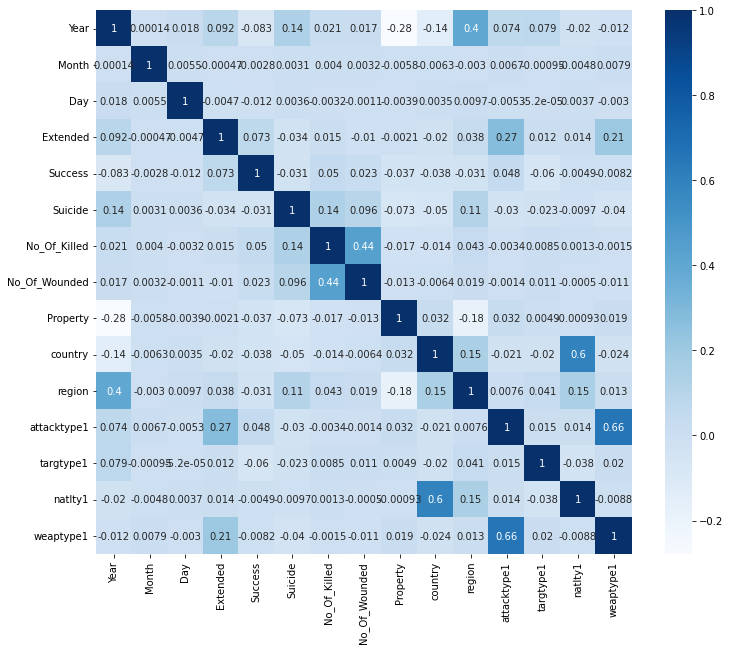

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split( X,y, test_size=0.2, random_state = 42)

In [ ]:
data_dict = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}
for i in data_dict:
    print("The shape of {} is {}".format(i,data_dict[i].shape))

The shape of X_train is (145352, 27)
The shape of X_test is (36339, 27)
The shape of y_train is (145352,)
The shape of y_test is (36339,)


In [ ]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 16, activation='relu', input_dim=27,))
classifier.add(Dense(units = 8, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy' , metrics =['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size=10 , epochs=50)

Epoch 1/50
14536/14536 [==============================] - 40s 3ms/step - loss: 0.2793 - accuracy: 0.8964
Epoch 2/50
14536/14536 [==============================] - 25s 2ms/step - loss: 0.2336 - accuracy: 0.9140
Epoch 3/50
14536/14536 [==============================] - 25s 2ms/step - loss: 0.2154 - accuracy: 0.9226
Epoch 4/50
14536/14536 [==============================] - 25s 2ms/step - loss: 0.2037 - accuracy: 0.9294
Epoch 5/50
14536/14536 [==============================] - 26s 2ms/step - loss: 0.1949 - accuracy: 0.9340
Epoch 6/50
14536/14536 [==============================] - 25s 2ms/step - loss: 0.1861 - accuracy: 0.9379
Epoch 7/50
14536/14536 [==============================] - 27s 2ms/step - loss: 0.1807 - accuracy: 0.9398
Epoch 8/50
14536/14536 [==============================] - 26s 2ms/step - loss: 0.1777 - accuracy: 0.9411
Epoch 9/50
14536/14536 [==============================] - 26s 2ms/step - loss: 0.1755 - accuracy: 0.9418
Epoch 10/50
14536/14536 [==============================

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([[0.9922879 ],
       [0.9054253 ],
       [0.29431415],
       ...,
       [0.99748886],
       [0.03167614],
       [0.8835716 ]], dtype=float32)

In [ ]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
countFalse =0
countTrue =0
for i in y_pred:
    if i[0] == False:
        countFalse += 1
    else:
        countTrue += 1
print("countF :{} and countT: {}".format(countFalse,countTrue))

countF :3118 and countT: 33221


In [ ]:
cm = confusion_matrix(y_test.values,y_pred)
print(cm)

[[ 2563  1415]
 [  555 31806]]


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.64      0.72      3978
           1       0.96      0.98      0.97     32361

    accuracy                           0.95     36339
   macro avg       0.89      0.81      0.85     36339
weighted avg       0.94      0.95      0.94     36339

